In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1
ml-03の講義資料や演習の内容を参考にしました。

## 問題の前準備

In [26]:
# Dataset IV
n = 200
x = 3 * (np.random.rand(n, 4) - 0.5)
x = x.astype(np.longdouble)
y = (2 * x[:, 0] - 1 * x[:, 1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y = 2 * y.astype(int) - 1

In [27]:
# 最初の5県を表示
print(x[:5])
print(y[:5])

[[ 0.56328377  1.40219165  1.36594014 -0.82538408]
 [ 1.17695375  0.61867317 -1.4562416   0.57228291]
 [ 1.08113572 -0.79287796 -0.97758952 -1.17814795]
 [ 0.38893864 -0.73012921  0.43052613 -1.48160164]
 [ 0.91412779  1.39123779 -0.78445817  0.7355403 ]]
[-1  1  1  1  1]


In [28]:
# xを4*5行列に変換して、最初の行は1にする
x = np.hstack([np.ones((n, 1)), x])
print(x[:5])

[[ 1.          0.56328377  1.40219165  1.36594014 -0.82538408]
 [ 1.          1.17695375  0.61867317 -1.4562416   0.57228291]
 [ 1.          1.08113572 -0.79287796 -0.97758952 -1.17814795]
 [ 1.          0.38893864 -0.73012921  0.43052613 -1.48160164]
 [ 1.          0.91412779  1.39123779 -0.78445817  0.7355403 ]]


In [29]:
# 諸々の関数の定義
def sigmoid(x):
    if x >= 0:
        return 1 / (1 + np.exp(-x))
    else:
        return np.exp(x) / (1 + np.exp(x))

def J(w, x, y, lam):
    answer = 0
    for x_i, y_i in zip(x, y):
        answer += np.log(1 + np.exp(-y_i * np.dot(w, x_i)))
    answer += lam / 2 * np.dot(w, w)
    return answer

def grad_J(w, x, y, lam):
    answer = np.zeros(len(w))
    for x_i, y_i in zip(x, y):
        # sigmoid関数の中身を-にしているのがポイント
        answer += -y_i * x_i * sigmoid(-y_i * np.dot(w, x_i))
    answer += lam * w
    return answer

def hess_J(w, x, y, lam):
    answer = np.zeros((len(w), len(w)))
    for x_i, y_i in zip(x, y):
        answer += np.outer(x_i, x_i) * sigmoid(-y_i * np.dot(w, x_i)) * sigmoid(y_i * np.dot(w, x_i))
    answer += lam * np.eye(len(w))
    return answer

## Batch steepest gradient method と Newton method の比較

In [30]:
def gradient_method(w_init, x, y, lam, eta, num_iter):
    w = w_init.copy()
    J_values = []
    for i in range(num_iter):
        w -= eta * grad_J(w, x, y, lam)
        J_values.append(J(w, x, y, lam))
    return w, J_values

def newton_method(w_init, x, y, lam, num_iter):
    w = w_init.copy()
    J_values = []
    for i in range(num_iter):
        w -= np.linalg.solve(hess_J(w, x, y, lam), grad_J(w, x, y, lam))
        J_values.append(J(w, x, y, lam))
    return w, J_values

# パラメータの初期値
w_init = np.random.rand(5)
lam = 0.1
eta = 0.1
num_iter = 100

# 勾配法でw_hatを求める。
w_hat, _ = gradient_method(w_init, x, y, lam, eta, num_iter)

In [31]:
# w_hatを使って、勾配法のJ(w)とJ(w_hat)の絶対値の差を計算する
num_iter = 100
_, gradinet_J_values = gradient_method(w_init, x, y, lam, eta, num_iter)

gradinet_J_diff = [np.abs(J_value - J(w_hat, x, y, lam)) for J_value in gradinet_J_values]
print(gradinet_J_diff)

[89.01998044497296, 6.4801581888916715, 1.0661097756473055, 0.31314099062905854, 0.19712388085064703, 0.15496378482890094, 0.12874549788924838, 0.10795666508722945, 0.09056502762768304, 0.0758763191060865, 0.06346965342591204, 0.05300912367674471, 0.04420766408949106, 0.03681710022918594, 0.030623080392082613, 0.025441106972046157, 0.02111297812052726, 0.017503534796013298, 0.01449769824399283, 0.011997796873671973, 0.009921175695041029, 0.008198076351654038, 0.006769771166297289, 0.005586931873295953, 0.004608212179455506, 0.0037990228753201905, 0.0031304785720323025, 0.0025784960609769314, 0.002123025584040761, 0.0017473978157198644, 0.0014377709706892006, 0.001182664085099816, 0.0009725641070659208, 0.0007995959331452696, 0.0006572459235201222, 0.0005401306926557936, 0.00044380411404887354, 0.0003645964887866171, 0.00029948071799879017, 0.00024596109597752047, 0.00020198101326940332, 0.00016584644029649098, 0.00013616255630211072, 0.0001117813137980761, 9.175808710892852e-05, 7.5315

In [32]:
# w_hatを使って、勾配法のJ(w)とJ(w_hat)の差を計算する
num_iter = 100
_, newton_J_values = newton_method(w_init, x, y, lam, num_iter)

newton_J_diff = [np.abs(J_value - J(w_hat, x, y, lam)) for J_value in newton_J_values]
print(newton_J_diff)

[22.03556274048333, 7.197936299017222, 1.4947580822730444, 0.10848154328047599, 0.0008145208339627175, 5.065803776460598e-08, 1.7061196899703646e-09, 1.7061054791156494e-09, 1.7061196899703646e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.7061054791156494e-09, 1.70610547

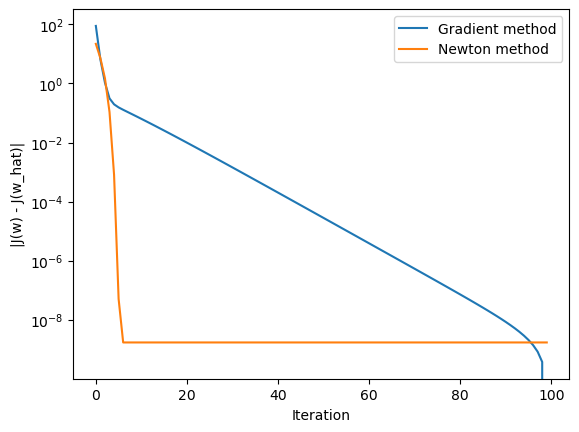

In [33]:
# 片対数グラフで表示
plt.plot(range(num_iter), gradinet_J_diff, label='Gradient method')
plt.plot(range(num_iter), newton_J_diff, label='Newton method')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('|J(w) - J(w_hat)|')
plt.legend()
plt.show()

Newton方のほうが答えに早くたどり着くことができる。

# Problem 2

## 1.

In [34]:
A = np.array(
    [[3, 0.5],
     [0.5, 1]]
)
mu = np.array([1, 2])
lam_list = np.arange(0, 10, 0.01) + 0.01

In [35]:
lam_list

array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
        0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
        0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
        0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,
        0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,
        0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,  0.72,
        0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,  0.81,
        0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,  0.9 ,
        0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,  0.99,
        1.  ,  1.01,  1.02,  1.03,  1.04,  1.05,  1.06,  1.07,  1.08,
        1.09,  1.1 ,  1.11,  1.12,  1.13,  1.14,  1.15,  1.16,  1.17,
        1.18,  1.19,  1.2 ,  1.21,  1.22,  1.23,  1.24,  1.25,  1.26,
        1.27,  1.28,

In [36]:
# 学習率の定義
eta = 1 / np.max(np.linalg.eigvals(A))
# 重みの初期値の定義
w_init = np.zeros_like(mu)
# イテレーション回数の定義
num_iter = 100

In [37]:
def J(w, A, mu, lam):
    return 0.5 * (w - mu) @ A @ (w - mu) + lam * np.linalg.norm(w, 1)

def prox_l1(v, lam, eta):
    return np.sign(v) * np.maximum(0, np.abs(v) - lam * eta)

def proximal_gradient_method(A, mu, lam, eta, num_iter):
    w = np.zeros_like(mu)
    obj_vals = []
    for t in range(num_iter):
        grad = A @ (w - mu)
        w = prox_l1(w - eta * grad, lam, eta)
        obj_val = J(w, A, mu, lam)
        obj_vals.append(obj_val)
    return w, obj_vals

まず|J(w(t)) - J(ŵ)|の対数グラフをプロットする。このときlam=0.01に固定する。

In [38]:
lam = 0.1

# 近接勾配法でw_hatを求めて、J(w_hat)の値を計算する
w_hat, obj_vals = proximal_gradient_method(A, mu, lam, eta, num_iter)
J_w_hat = J(w_hat, A, mu, 0.1)

# 結果の表示
print(w_hat)


[0.98181818 1.90909091]


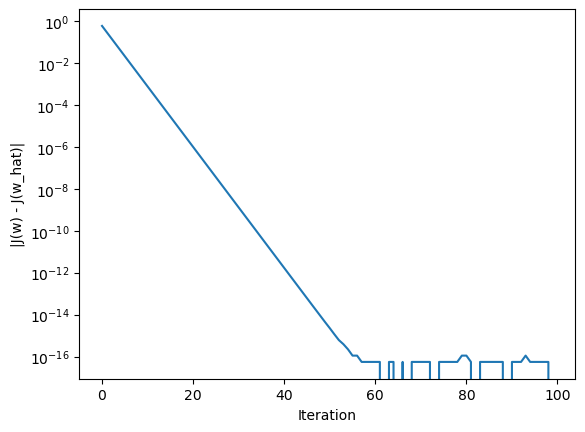

In [39]:
# J(w_hat)とJ(w(t))の差を計算する
obj_diff = [np.abs(J_value - J_w_hat) for J_value in obj_vals]
# グラフの描画
plt.plot(range(num_iter), obj_diff)
plt.xlabel('Iteration')
plt.ylabel('|J(w) - J(w_hat)|')
plt.yscale('log')
plt.show()

次にlambdaを変化させて、w_hatがどのように変化するのかをプロットする。

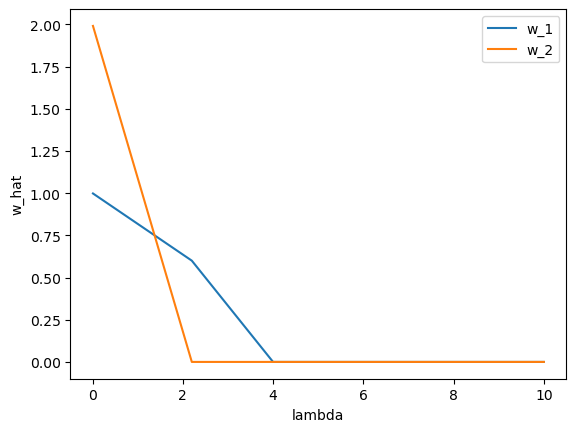

In [40]:
w_hat_list = []
for lam in lam_list:
    w_hat, _ = proximal_gradient_method(A, mu, lam, eta, num_iter)
    w_hat_list.append(w_hat)

plt.plot(lam_list, w_hat_list)
plt.xlabel('lambda')
plt.ylabel('w_hat')
plt.legend(['w_1', 'w_2'])

## 2.

In [41]:
A_dash = np.array(
    [[300, 0.5],
     [0.5, 10]]
)

In [42]:
lam = 0.1
eta = 1 / np.max(np.linalg.eigvals(A_dash))
num_iter = 50
# 近接勾配法でw_hatを求めて、J(w_hat)の値を計算する
PG_w_hat, PG_obj_vals = proximal_gradient_method(A_dash, mu, lam, eta, num_iter)

# 結果の表示
print(PG_w_hat)

[1.00031275 1.62494025]


In [43]:
# AdaGradの実装
def adagrad(A, mu, lam, eta_init, epsilon, num_iter=1000):
    w = np.zeros_like(mu, dtype=np.float64)
    G = np.zeros_like(mu, dtype=np.float64)
    obj_vals = []
    
    for t in range(num_iter):
        grad = A @ (w - mu)
        G += grad ** 2
        eta_t = eta_init / (np.sqrt(G) + epsilon)
        w = prox_l1(w - eta_t * grad, lam, eta_t)
        obj_val = J(w, A, mu, lam)
        obj_vals.append(obj_val)
    
    return w, obj_vals

In [44]:
# AdaGradでw_hatを求める
lam = 0.1
eta_init = 0.5
epsilon = 1e-8
num_iter = 50
AdaGrad_w_hat, AdaGrad_obj_vals = adagrad(A_dash, mu, lam, eta_init, epsilon, num_iter)

# 結果の表示
print(AdaGrad_w_hat)

[0.99968458 1.98951696]


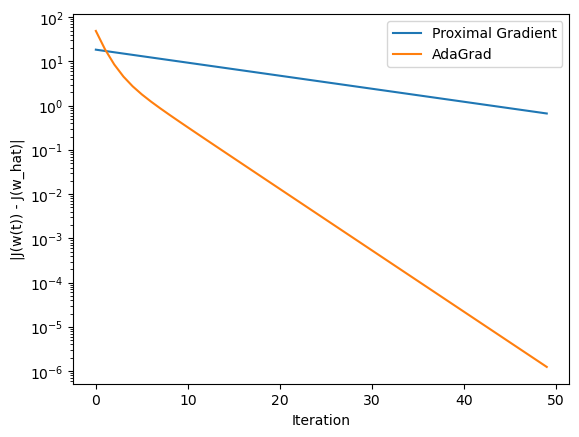

In [24]:
# 今回w_hatはAdaGradのnum_iter=100の時の値を使う
w_hat, _ = adagrad(A_dash, mu, lam, eta_init, epsilon, 100)

# J(w_hat)とJ(w(t))の差を計算する
PG_obj_diff = [np.abs(J_value - J(w_hat, A_dash, mu, lam)) for J_value in PG_obj_vals]
AdaGrad_obj_diff = [np.abs(J_value - J(w_hat, A_dash, mu, lam)) for J_value in AdaGrad_obj_vals]

# グラフの描画
plt.plot(range(num_iter), PG_obj_diff, label='Proximal Gradient')
plt.plot(range(num_iter), AdaGrad_obj_diff, label='AdaGrad')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('|J(w(t)) - J(w_hat)|')
plt.legend()
plt.show()